In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('Fertilizer_recommendation.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,Rice,90,49,36,Urea
1,25,84,32,Loamy,Rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [37]:
data.tail()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
547,12,95,42,Sandy,Orange,11,14,5,10-10-2k10
548,12,95,42,Sandy,Orange,11,14,5,10-10-2k10
549,27,80,31,Clayey,Kidneybeans,19,21,6,10-10-2k10
550,27,80,31,Clayey,Kidneybeans,19,21,6,10-10-2k10
551,27,80,31,Clayey,Kidneybeans,19,21,6,10-10-2k10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [4]:
#checking unique values
data.nunique()

Temparature    21
Humidity       34
Moisture       41
Soil_Type       5
Crop_Type      17
Nitrogen       47
Potassium      31
Phosphorous    36
Fertilizer     14
dtype: int64

In [5]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [6]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-2k10'],
      dtype=object)

In [7]:
data['Crop_Type'].unique()

array(['Rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'Pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'Coffee', 'Watermelon', 'Barley', 'Kidneybeans', 'Orange'],
      dtype=object)

In [8]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


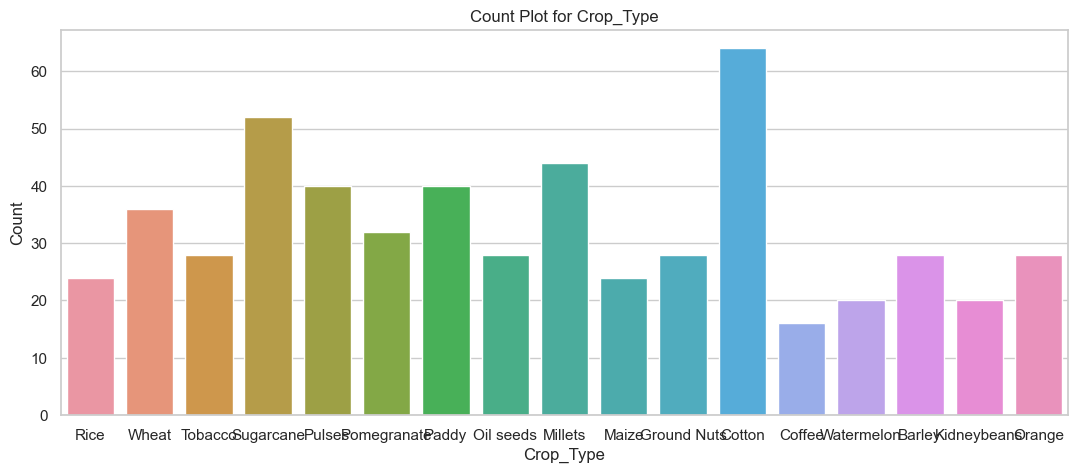

In [9]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

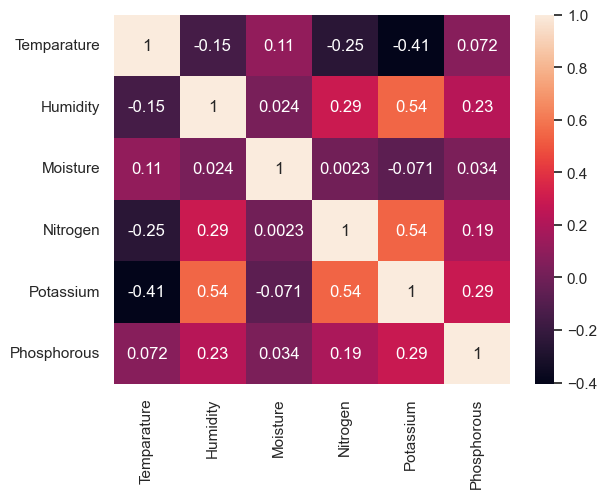

In [10]:
#Heatmap for Correlation Analysis
sns.heatmap(data.corr(),annot=True)

In [11]:
#here is no such correlation between any of variables.. 

In [12]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [13]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [14]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Coffee,1
Cotton,2
Ground Nuts,3
Kidneybeans,4
Maize,5
Millets,6
Oil seeds,7
Orange,8


In [15]:
# encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-2k10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [16]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (441, 8), y_train = (441,), x_test = (111, 8), y_test = (111,)


In [17]:
# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
#x_train and x_test = contain the features (independent variables) used for training and testing the model
#y_train and y_test = contains the labels(dependent variable) used for training and testing the model.

In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 213 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  441 non-null    int64
 1   Humidity     441 non-null    int64
 2   Moisture     441 non-null    int64
 3   Soil_Type    441 non-null    int32
 4   Crop_Type    441 non-null    int32
 5   Nitrogen     441 non-null    int64
 6   Potassium    441 non-null    int64
 7   Phosphorous  441 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 27.6 KB


In [19]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')

# Initialize lists for storing results
acc = []
acc1 = []
model = []

# Creating and training the model
ds = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
ds.fit(x_train, y_train)

# Predict on test data
predicted_test = ds.predict(x_test)
test_accuracy = accuracy_score(y_test, predicted_test)
acc.append(test_accuracy)
model.append('Decision Tree')

# Predict on training data
predicted_train = ds.predict(x_train)
train_accuracy = accuracy_score(y_train, predicted_train)
acc1.append(train_accuracy)

# Print accuracies
print(f"Decision Tree's Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Decision Tree's Train Accuracy: {train_accuracy*100:.2f}%")

# Classification report for test data
print("Classification Report on Test Data:")
print(classification_report(y_test, predicted_test))


Decision Tree's Test Accuracy: 90.09%
Decision Tree's Train Accuracy: 93.42%
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.92      0.75      0.83        16
           9       0.00      0.00      0.00         1
          10       0.33      1.00      0.50         2
          11       0.00      0.00      0.00         3
          12       0.64      1.00      0.78         7
          13       1.00      0.94      0.97        18

    accuracy                           0.90       111
   macro avg       0.

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
NaiveBayes = GaussianNB()

# Train the model
NaiveBayes.fit(x_train, y_train)

# Make predictions on test data
predicted_test = NaiveBayes.predict(x_test)
test_accuracy = accuracy_score(y_test, predicted_test)
acc.append(test_accuracy)

# Make predictions on training data
predicted_train = NaiveBayes.predict(x_train)
train_accuracy = accuracy_score(y_train, predicted_train)
acc1.append(train_accuracy)

# Append model name
model.append('Naive Bayes')

# Print accuracies
print(f"Naive Bayes Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Naive Bayes Train Accuracy: {train_accuracy*100:.2f}%")

# Classification report for test data
print("Classification Report on Test Data:")
print(classification_report(y_test, predicted_test))


Naive Bayes Test Accuracy: 94.59%
Naive Bayes Train Accuracy: 91.38%
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.88      0.88      0.88        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.60      1.00      0.75         3
          12       0.75      0.86      0.80         7
          13       1.00      0.83      0.91        18

    accuracy                           0.95       111
   macro avg       0.94      

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# Data normalization
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

# Initialize and train SVM model
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm, y_train)

# Predictions on test data
predicted_test = SVM.predict(X_test_norm)
test_accuracy = accuracy_score(y_test, predicted_test)
acc.append(test_accuracy)

# Predictions on training data
predicted_train = SVM.predict(X_train_norm)
train_accuracy = accuracy_score(y_train, predicted_train)
acc1.append(train_accuracy)

# Append model name
model.append('SVM')

# Print accuracies
print(f"SVM Test Accuracy: {test_accuracy*100:.2f}%")
print(f"SVM Train Accuracy: {train_accuracy*100:.2f}%")

# Classification report for test data
print("Classification Report on Test Data:")
print(classification_report(y_test, predicted_test))


SVM Test Accuracy: 96.40%
SVM Train Accuracy: 99.09%
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.70      0.82        10
           2       1.00      1.00      1.00         1
           3       0.80      1.00      0.89        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         7
          13       1.00      0.94      0.97        18

    accuracy                           0.96       111
   macro avg       0.97      0.97      0.97  

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
LogReg = LogisticRegression(random_state=2, solver='lbfgs', max_iter=1000)

# Train the model
LogReg.fit(x_train, y_train)

# Predictions on test data
predicted_test = LogReg.predict(x_test)
test_accuracy = accuracy_score(y_test, predicted_test)
acc.append(test_accuracy)

# Predictions on training data
predicted_train = LogReg.predict(x_train)
train_accuracy = accuracy_score(y_train, predicted_train)
acc1.append(train_accuracy)

# Append model name
model.append('Logistic Regression')

# Print accuracies
print(f"Logistic Regression Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Logistic Regression Train Accuracy: {train_accuracy*100:.2f}%")

# Classification report for test data
print("Classification Report on Test Data:")
print(classification_report(y_test, predicted_test))


Logistic Regression Test Accuracy: 83.78%
Logistic Regression Train Accuracy: 91.38%
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.60      0.75      0.67        16
           9       1.00      1.00      1.00         1
          10       1.00      0.50      0.67         2
          11       0.50      0.33      0.40         3
          12       0.14      0.14      0.14         7
          13       0.84      0.89      0.86        18

    accuracy                           0.84       111
   macro avg 

In [23]:
x_train.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
213,26,53,28,2,1,85,33,25
92,26,52,32,0,7,12,0,8
66,30,60,47,4,0,12,0,42
314,25,78,40,2,2,102,37,25
119,34,65,62,0,2,7,9,30


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model with hyperparameter tuning
RF = RandomForestClassifier(
    n_estimators=200,          # More trees for better generalization
    max_depth=10,              # Restrict depth to prevent overfitting
    min_samples_split=10,      # Require more samples to split a node
    min_samples_leaf=5,        # Require more samples in leaf nodes
    max_features="sqrt",       # Reduce number of features considered per split
    random_state=0
)

# Train the model
RF.fit(x_train, y_train)

# Predictions on test data
predicted_test = RF.predict(x_test)
test_accuracy = accuracy_score(y_test, predicted_test)
acc.append(test_accuracy)

# Predictions on training data
predicted_train = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, predicted_train)
acc1.append(train_accuracy)

# Append model name
model.append('Random Forest')

# Print accuracies
print(f"Random Forest Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Random Forest Train Accuracy: {train_accuracy*100:.2f}%")

# Classification report for test data
print("Classification Report on Test Data:")
print(classification_report(y_test, predicted_test))


Random Forest Test Accuracy: 98.20%
Random Forest Train Accuracy: 98.64%
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.94      1.00      0.97        16
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         2
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         7
          13       1.00      0.94      0.97        18

    accuracy                           0.98       111
   macro avg       0.91  

In [25]:
from sklearn.model_selection import cross_val_score

# Splitting data into features (X) and target (y)
X = data.drop(columns=['Fertilizer'])  # Features
y = data['Fertilizer']                 # Target

# Performing cross-validation for each model
score = cross_val_score(RF, X, y, cv=5, scoring='accuracy')
print("Cross-validation score of RF is:", score.mean())

score = cross_val_score(LogReg, X, y, cv=5, scoring='accuracy')
print("Cross-validation score of LogReg is:", score.mean())

score = cross_val_score(SVM, X, y, cv=5, scoring='accuracy')
print("Cross-validation score of SVM is:", score.mean())

score = cross_val_score(NaiveBayes, X, y, cv=5, scoring='accuracy')
print("Cross-validation score of NaiveBayes is:", score.mean())

score = cross_val_score(ds, X, y, cv=5, scoring='accuracy')
print("Cross-validation score of Decision Tree is:", score.mean())


Cross-validation score of RF is: 0.9457166257166257
Cross-validation score of LogReg is: 0.8658640458640459
Cross-validation score of SVM is: 0.9238656838656839
Cross-validation score of NaiveBayes is: 0.9094840294840294
Cross-validation score of Decision Tree is: 0.904045864045864


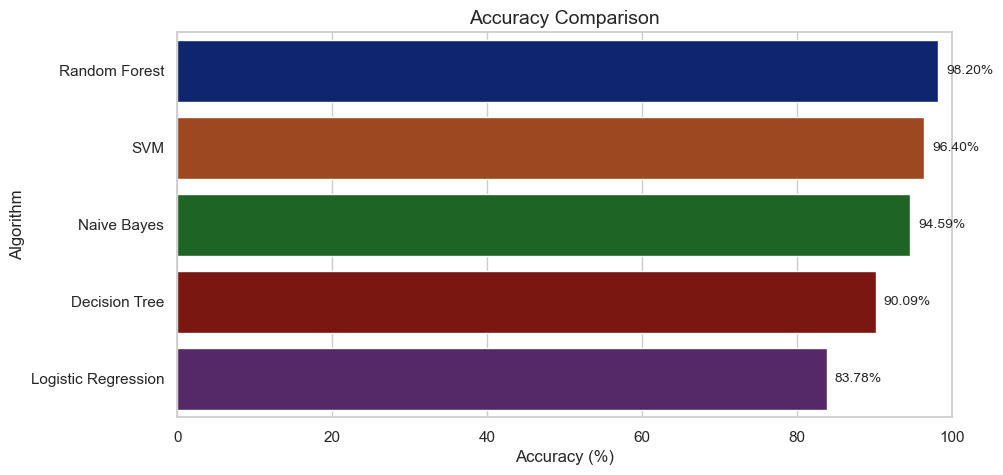

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert accuracy to percentage
acc_percentage = [a * 100 for a in acc]  

# Sort models by accuracy for better visualization
sorted_indices = sorted(range(len(acc_percentage)), key=lambda i: acc_percentage[i], reverse=True)
sorted_acc = [acc_percentage[i] for i in sorted_indices]
sorted_model = [model[i] for i in sorted_indices]

# Plot
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison', fontsize=14)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Algorithm', fontsize=12)
sns.barplot(x=sorted_acc, y=sorted_model, palette='dark')

# Add values on bars
for i, v in enumerate(sorted_acc):
    plt.text(v + 1, i, f"{v:.2f}%", va='center', fontsize=10)  # Adjust spacing

plt.xlim(0, 100)  # Set x-axis range to 0-100%
plt.show()


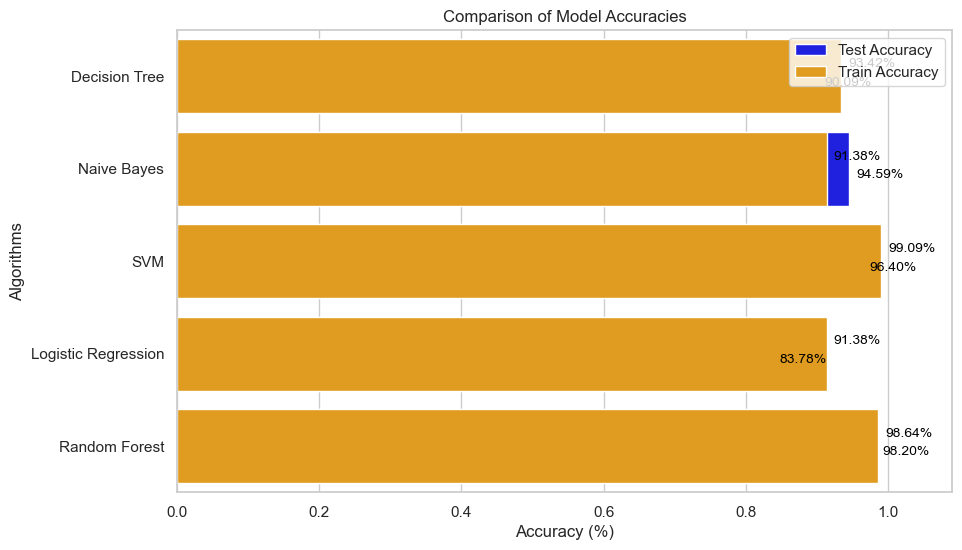

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame({'Model': model, 'Test Accuracy': acc, 'Train Accuracy': acc1})

# Set style
sns.set_theme(style="whitegrid")

# Plot the accuracies
plt.figure(figsize=(10, 6), dpi=100)
ax = sns.barplot(x='Test Accuracy', y='Model', data=df, color='blue', label='Test Accuracy')
ax = sns.barplot(x='Train Accuracy', y='Model', data=df, color='orange', label='Train Accuracy')

# Add value labels on bars
for index, value in enumerate(acc):
    plt.text(value + 0.01, index + 0.1, f"{value * 100:.2f}%", fontsize=10, color='black')

for index, value in enumerate(acc1):
    plt.text(value + 0.01, index - 0.1, f"{value * 100:.2f}%", fontsize=10, color='black')

# Add labels and title
plt.xlabel("Accuracy (%)")
plt.ylabel("Algorithms")
plt.title("Comparison of Model Accuracies")
plt.legend()
plt.xlim(0, max(max(acc), max(acc1)) + 0.1)  # Adjusting x-axis limit

# Show the plot
plt.show()


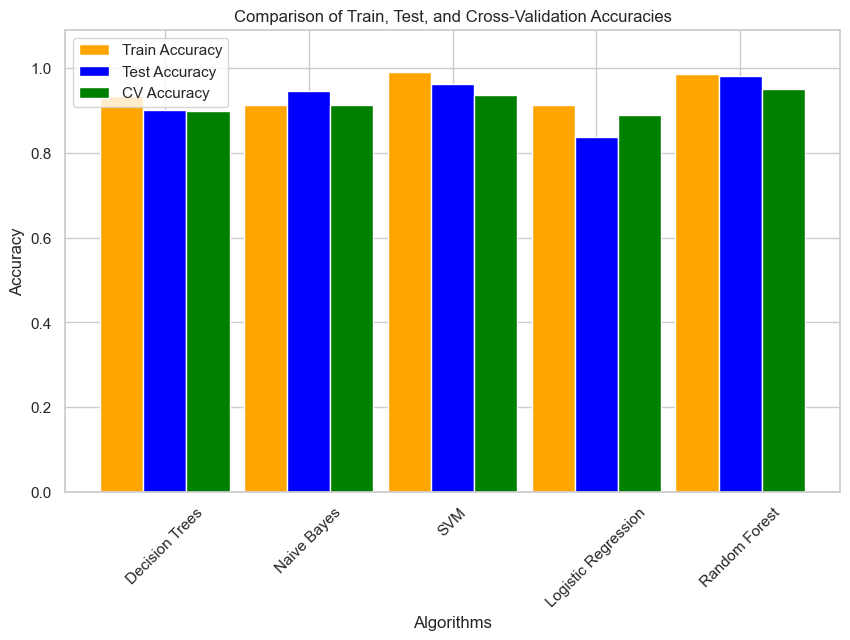

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score

# Lists to store accuracy values
cv_acc = []  # Cross-validation accuracy
test_acc = acc  # Test accuracy (already computed)
train_acc = acc1  # Train accuracy (already computed)

# Cross-validation for each model
models = {
    'Decision Trees': ds,
    'Naive Bayes': NaiveBayes,
    'SVM': SVM,
    'Logistic Regression': LogReg,
    'Random Forest': RF
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_acc.append(np.mean(scores))  # Store average CV accuracy

# Create DataFrame
df = pd.DataFrame({'Model': list(models.keys()), 
                   'Train Accuracy': train_acc, 
                   'Test Accuracy': test_acc, 
                   'CV Accuracy': cv_acc})

# Set style
sns.set_theme(style="whitegrid")

# Plot the bar chart
plt.figure(figsize=(10, 6), dpi=100)

# Define bar width
bar_width = 0.3

# X-axis positions
x = np.arange(len(df['Model']))

# Plot bars
plt.bar(x - bar_width, df['Train Accuracy'], width=bar_width, color='orange', label='Train Accuracy')
plt.bar(x, df['Test Accuracy'], width=bar_width, color='blue', label='Test Accuracy')
plt.bar(x + bar_width, df['CV Accuracy'], width=bar_width, color='green', label='CV Accuracy')

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Train, Test, and Cross-Validation Accuracies")
plt.xticks(x, df['Model'], rotation=45)
plt.legend()
plt.ylim(0, max(max(train_acc), max(test_acc), max(cv_acc)) + 0.1)  # Adjusting y-axis limit

# Show the plot
plt.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset
df = pd.read_csv('Fertilizer_recommendation.csv')

# Encode categorical features
label_encoders = {}
for col in ['Soil_Type', 'Crop_Type', 'Fertilizer']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['Fertilizer'])
y = df['Fertilizer']

# K-Fold Cross-Validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_conf_matrices = []
fold_class_reports = []

# Train model using K-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    fold_accuracies.append(acc)
    fold_conf_matrices.append(conf_matrix)
    fold_class_reports.append(class_report)

# Train final model on full dataset
final_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_model.fit(X, y)

# Save model and encoders
joblib.dump(final_rf_model, "fertilizer_rf_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

# Print K-Fold results
print("Average Accuracy over 5 folds:", np.mean(fold_accuracies))
for i, (conf_matrix, class_report) in enumerate(zip(fold_conf_matrices, fold_class_reports)):
    print(f"Fold {i+1} Confusion Matrix:\n", conf_matrix)
    print(f"Fold {i+1} Classification Report:\n", class_report)


Average Accuracy over 5 folds: 1.0
Fold 1 Confusion Matrix:
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22]]
Fold 1 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
      

In [38]:
import pandas as pd
import joblib

# Load trained model and encoders
rf_model = joblib.load("fertilizer_rf_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")

def predict_fertilizer(input_data):
    """
    Predicts the fertilizer recommendation based on input features.
    :param input_data: Dictionary containing feature values.
    :return: Predicted fertilizer type.
    """
    # Convert input data into DataFrame
    df = pd.DataFrame([input_data])

    # Ensure correct feature order
    feature_order = ["Temparature", "Humidity", "Moisture", "Soil_Type", "Crop_Type", "Nitrogen", "Potassium", "Phosphorous"]
    df = df[feature_order]

    # Encode categorical features
    for col in ['Soil_Type', 'Crop_Type']:
        if col in df.columns:
            df[col] = label_encoders[col].transform(df[col])

    # Make prediction
    prediction = rf_model.predict(df)

    # Decode the predicted fertilizer type
    predicted_fertilizer = label_encoders['Fertilizer'].inverse_transform(prediction)

    return predicted_fertilizer[0]

# Example usage
sample_input = {
    "Temparature": 12,
    "Humidity": 95,
    "Moisture": 42,
    "Soil_Type": "Sandy",
    "Crop_Type": "Orange",
    "Nitrogen": 11,
    "Potassium": 14,
    "Phosphorous": 5
}

predicted_fertilizer = predict_fertilizer(sample_input)
print("Recommended Fertilizer:", predicted_fertilizer)


Recommended Fertilizer: 10-10-2k10
